# Guided Project #12 - Investigating Fandango Movie Ratings

By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)


In this guided project, I'll continue Walt Hickey's data science project. In October 2015 he published an article on FiveThirtyEight where he explained that Fandango was displaying higher ratings to its users.

Lets see if 3 years later the way they display ratings has changed or not, and if they're still inflating ratings.

## 1.- Understanding the Data.
Import `pandas` module and read provided files.

In [77]:
import pandas as pd

fandango15 = pd.read_csv("fandango_score_comparison.csv")
fandango1617 = pd.read_csv("movie_ratings_16_17.csv")

In [78]:
fandango15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [79]:
fandango1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [80]:
hickey = fandango15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                    'Fandango_votes', 'Fandango_Difference']]
mircea = fandango1617[['movie', 'year', 'fandango']]
print(hickey.shape)
print(mircea.shape)

(146, 5)
(214, 3)


According to the data in Github from Hickey and Mircea, the movies available were selected according to a criteria (Having more user reviews). This lets me concur that the sampling was not random.

## 2.- Changing the Goal of Analysis.
Since the original data was selected by a criteria, I will need to change the goal of this project. Instead of finding out if Fandango changed its rating system for all movies, I will focus only on popular movies that fit the criteria Hickey and Mircea used. Hickey used movies with more than 30 reviews, but I don't have that information available from Mircea's data. I will have to manually look up the reviews online using sampling.

In [81]:
sample1 = mircea["movie"].sample(10, random_state = 1)
sample1

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

Movie | Fan Ratings (October 16, 2018)
-|
Mechanic: Resurrection | 2249
Warcraft | 7278
Max Steel | 493
Me Before You | 5269
Fantastic Beasts and Where to Find Them | 13459
Cell | 18
Genius | 127
Sully | 11885
A Hologram for the King | 500
Captain America: Civil War | 35123

It seems that the selected population will work for this analysis.

## 3.- Isolating the Samples Needed.
Isolate movies from 2015 and from 2016.

In [82]:
# This code will erase all movies not made in 2015.
hickey = hickey[hickey["FILM"].str.contains("(2015)", regex = False)]
# This code will derase all movies not made in 2016.
mircea = mircea[mircea['year'] == 2016]
print(hickey.shape)
print(mircea.shape)

(129, 5)
(191, 3)


## 4.- Comparing Distribution Shapes for 2015 and 2016.
Setup `matplotlib` and `numpy` and use KDE plots for distribution visualization.

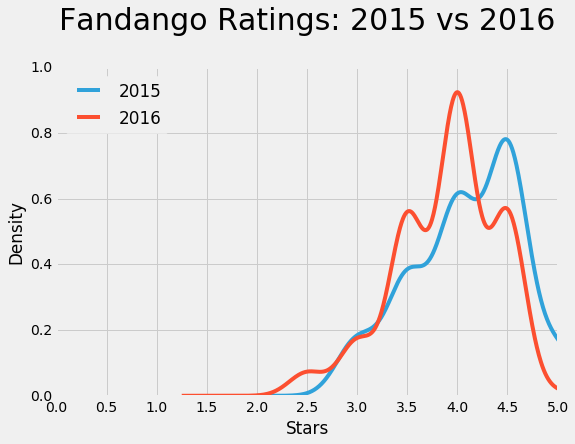

In [126]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.style.use('fivethirtyeight')
hickey["Fandango_Stars"].plot.kde(label = 2015, legend = True, xticks = xticks)
mircea["fandango"].plot.kde(label = 2016, legend = True, figsize = (8,5.5))
plt.title("Fandango Ratings: 2015 vs 2016", y= 1.1)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.gca().title.set_fontsize(30)
plt.show()

Both KDP are left skewed, although it seems that in 2016 the ratings were not as high as on the previous year. The year 2016 appears to have a normalized distribution as well. 

## 5.- Comparing Relative Frequencies.
Use `value_counts()` and other methods to determine distributions.

In [135]:
print(hickey["Fandango_Stars"].value_counts().sort_index())
print(mircea["fandango"].value_counts().sort_index())

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64
2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64


I'm not able to determine the distribution with ease using movie numbers. I'll switch to using percentages.

In [146]:
print(hickey["Fandango_Stars"].value_counts(normalize = True).sort_index()*100)
print(mircea["fandango"].value_counts(normalize = True).sort_index()*100)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


The result is the same as was presented in the above plot. All ratings moved to the left of the scale and bumped the quantity of reviews for those values higher.

## 6.- Determining the Direction of the Change.
Use `value_counts()` and other methods to determine distributions.

In [152]:
print(hickey["Fandango_Stars"].mean())
print(hickey["Fandango_Stars"].median())
print(hickey["Fandango_Stars"].mode()[0]) # This was wierd.

4.0852713178294575
4.0
4.5


Better to put it in a dataframe and be able to plot it.

In [155]:
statistics = pd.DataFrame()
statistics["2015"] = [hickey["Fandango_Stars"].mean(), hickey["Fandango_Stars"].median(), hickey["Fandango_Stars"].mode()[0]]
statistics["2016"] = [mircea["fandango"].mean(), mircea["fandango"].median(), mircea["fandango"].mode()[0]]
statistics.index = ["mean", "median", "mode"]
statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


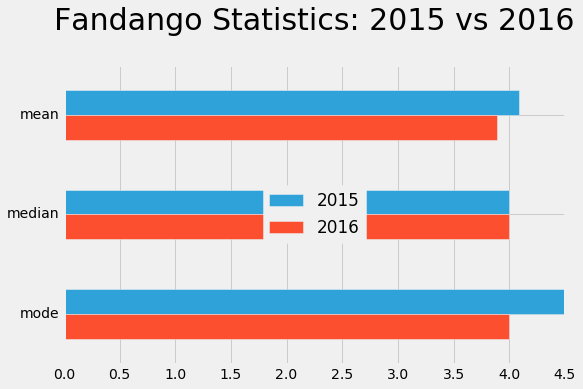

In [167]:
statistics.plot.barh(figsize = (8,5))
plt.gca().invert_yaxis()
plt.title("Fandango Statistics: 2015 vs 2016", y= 1.1)
plt.legend(loc = 10)
plt.gca().title.set_fontsize(30)
plt.show()

There's just a slight difference towards the left of the value, which is consistent with my above analysis.

## 7.- Next steps.

* Reproduce the graphs in a complete FiveThirtyEight style.
* Improve style of guided project.
* Recommend which website is the best to check for a movie rating.
* Scrape movie ratings from IMDB and Metacritic.

To be continued...